In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
len(df['quality'].unique())

6

In [6]:
df['quality'].nunique()

6

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
df.duplicated().sum()


240

In [10]:
df=df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
demo_df=pd.DataFrame([1,2,3,3,23,2,1,2,123,333])

In [13]:
demo_df

,0
0,1
1,2
2,3
3,3
4,23
5,2
6,1
7,2
8,123
9,333


In [14]:
demo_df.duplicated().sum()

4

In [15]:
X=df.drop("quality",axis=1)

In [16]:
y=df['quality']

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [19]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
scr.fit()
scr.transform()'''


'from sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import StandardScaler\nsclr = StandardScaler()\nscr.fit()\nscr.transform()'

In [20]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
model.score(X_train,y_train)

1.0

In [23]:
y_predict=model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,y_predict)

0.512249443207127

In [26]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [27]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=5)

In [28]:
grid_searh.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [29]:
grid_searh.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [30]:
model_with_best_params=DecisionTreeClassifier(criterion= 'entropy',max_depth= 28,min_samples_leaf= 9,min_samples_split= 2,splitter='random')

In [31]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_leaf=9,
                       splitter='random')

[Text(0.5668604651162791, 0.9166666666666666, 'x[10] <= 11.132\nentropy = 1.721\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.31976744186046513, 0.75, 'x[10] <= 10.228\nentropy = 1.523\nsamples = 682\nvalue = [7, 23, 364, 241, 46, 1]'),
 Text(0.1744186046511628, 0.5833333333333334, 'x[6] <= 93.364\nentropy = 1.297\nsamples = 486\nvalue = [4, 15, 308, 145, 14, 0]'),
 Text(0.09302325581395349, 0.4166666666666667, 'x[0] <= 9.371\nentropy = 1.398\nsamples = 405\nvalue = [4, 15, 233, 139, 14, 0]'),
 Text(0.046511627906976744, 0.25, 'x[1] <= 0.66\nentropy = 1.295\nsamples = 307\nvalue = [2, 12, 190, 97, 6, 0]'),
 Text(0.023255813953488372, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.06976744186046512, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.13953488372093023, 0.25, 'x[6] <= 52.685\nentropy = 1.609\nsamples = 98\nvalue = [2, 3, 43, 42, 8, 0]'),
 Text(0.11627906976744186, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.16279069767441862, 0.08333333333333333, '\n  (...)

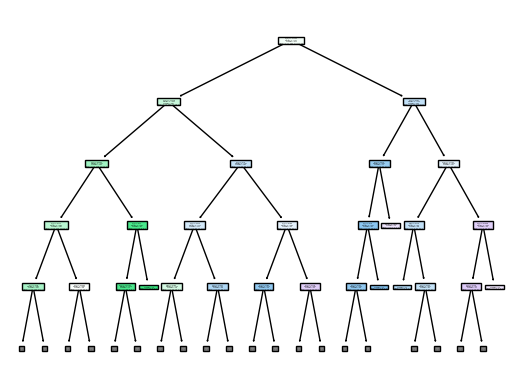

In [32]:
from sklearn import tree
tree.plot_tree(model_with_best_params,filled=True,max_depth=4)


In [33]:
y_prediction2=model_with_best_params.predict(X_test)

In [34]:
accuracy_score(y_test,y_prediction2)

0.5367483296213809

In [35]:
#logistic regression, SVM ,  going forward(RF,XB,GB,AB)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [37]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
rf_model.score(X_train,y_train)

1.0

In [39]:
rf_predict=rf_model.predict(X_test)

In [40]:
accuracy_score(y_test,rf_predict)

0.5879732739420935

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [45]:
print(accuracy_score(y_test,rf_predict))
print("===============================")
print(confusion_matrix(y_test,rf_predict))
print("===============================")
print(classification_report(y_test,rf_predict))

0.5879732739420935
[[  0   0   3   0   0   0]
 [  1   0  15   6   0   0]
 [  0   0 131  54   3   0]
 [  0   1  48 116  11   0]
 [  0   0   5  30  17   1]
 [  0   0   0   5   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        22
           5       0.65      0.70      0.67       188
           6       0.55      0.66      0.60       176
           7       0.52      0.32      0.40        53
           8       0.00      0.00      0.00         7

    accuracy                           0.59       449
   macro avg       0.29      0.28      0.28       449
weighted avg       0.55      0.59      0.56       449

